# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_names = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 1
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date = datetime.datetime.fromtimestamp(int(response['dt'])).strftime('%m-%d-%Y')
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | westerland
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | kulhudhuffushi
Processing Record 6 of Set 1 | atuona
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | kapaa
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | slavutych
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 

Processing Record 32 of Set 4 | arman
City not found. Skipping...
Processing Record 33 of Set 4 | lilongwe
Processing Record 34 of Set 4 | vardo
City not found. Skipping...
Processing Record 35 of Set 4 | turukhansk
Processing Record 36 of Set 4 | saldanha
Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | husavik
Processing Record 39 of Set 4 | solenzo
Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | aketi
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | marbella
Processing Record 44 of Set 4 | nantucket
Processing Record 45 of Set 4 | ust-ilimsk
Processing Record 46 of Set 4 | lata
Processing Record 47 of Set 4 | saint anthony
Processing Record 48 of Set 4 | moroni
Processing Record 49 of Set 4 | kwaluseni
Processing Record 50 of Set 4 | guilin
Processing Record 0 of Set 5 | serramanna
Processing Record 1 of Set 5 | nome
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | wamba
Processing Recor

Processing Record 18 of Set 8 | coihueco
Processing Record 19 of Set 8 | bathsheba
City not found. Skipping...
Processing Record 20 of Set 8 | port hardy
Processing Record 21 of Set 8 | baker city
Processing Record 22 of Set 8 | tura
City not found. Skipping...
Processing Record 23 of Set 8 | kysyl-syr
Processing Record 24 of Set 8 | pizhanka
Processing Record 25 of Set 8 | touros
Processing Record 26 of Set 8 | estelle
Processing Record 27 of Set 8 | ahipara
Processing Record 28 of Set 8 | payson
Processing Record 29 of Set 8 | dalianwan
Processing Record 30 of Set 8 | soanierana ivongo
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | jalingo
Processing Record 33 of Set 8 | ninohe
Processing Record 34 of Set 8 | amalapuram
Processing Record 35 of Set 8 | sinnamary
Processing Record 36 of Set 8 | mayumba
Processing Record 37 of Set 8 | adolfo lopez mateos
Processing Record 38 of Set 8 | mandan
Processing Record 39 of Set 8 | lhokseumawe
Processing Record 40 

Processing Record 2 of Set 12 | sambava
Processing Record 3 of Set 12 | trojes
Processing Record 4 of Set 12 | obera
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#dataframe
city_data_df = pd.DataFrame({
    "City": city_names,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,50.68,86,50,15.28,AU,10-19-2021
1,Westerland,54.9079,8.3033,59.18,100,90,21.85,DE,10-19-2021
2,Cape Town,-33.9258,18.4232,66.34,61,0,1.99,ZA,10-19-2021
3,Kulhudhuffushi,6.6221,73.0700,81.88,74,44,11.25,MV,10-19-2021
4,Atuona,-9.8000,-139.0333,78.39,75,26,21.00,PF,10-19-2021
...,...,...,...,...,...,...,...,...,...
559,Ile-Ife,7.4667,4.5667,73.63,96,72,2.98,NG,10-19-2021
560,Constitución,-35.3333,-72.4167,66.02,58,4,5.99,CL,10-19-2021
561,Sambava,-14.2667,50.1667,72.81,83,63,7.78,MG,10-19-2021
562,Trojes,41.7560,19.9620,52.29,69,18,4.79,AL,10-19-2021


In [5]:
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,19.327866,11.794693,62.314096,69.203901,57.319149,8.033830
std,34.169081,89.151554,20.892054,21.530826,38.154090,5.754849
min,-54.800000,-179.166700,-13.490000,8.000000,0.000000,0.000000
25%,-8.807350,-63.350075,45.687500,58.000000,20.000000,3.440000
50%,21.551700,14.970700,68.920000,74.000000,70.000000,6.910000
75%,49.547950,83.531675,78.407500,86.000000,96.000000,11.377500
max,78.218600,179.316700,100.710000,100.000000,100.000000,35.680000


In [7]:
# Export the city data into a csv file
city_data_df.to_csv("../output_data/city_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Drop any row which has a humidity higher than 100%
cleaned_cities_df = city_data_df.loc[city_data_df['Humidity'] <= 100]
cleaned_cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,50.68,86,50,15.28,AU,10-19-2021
1,Westerland,54.9079,8.3033,59.18,100,90,21.85,DE,10-19-2021
2,Cape Town,-33.9258,18.4232,66.34,61,0,1.99,ZA,10-19-2021
3,Kulhudhuffushi,6.6221,73.0700,81.88,74,44,11.25,MV,10-19-2021
4,Atuona,-9.8000,-139.0333,78.39,75,26,21.00,PF,10-19-2021
...,...,...,...,...,...,...,...,...,...
559,Ile-Ife,7.4667,4.5667,73.63,96,72,2.98,NG,10-19-2021
560,Constitución,-35.3333,-72.4167,66.02,58,4,5.99,CL,10-19-2021
561,Sambava,-14.2667,50.1667,72.81,83,63,7.78,MG,10-19-2021
562,Trojes,41.7560,19.9620,52.29,69,18,4.79,AL,10-19-2021


In [9]:
#  Get the indices of cities that have humidity over 100%.
cleaned_cities_2_df = city_data_df.loc[city_data_df['Humidity'] > 100]
cleaned_cities_2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
print("There are no cities with Humidity greater than 100. Skipping to next step.")

There are no cities with Humidity greater than 100. Skipping to next step.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

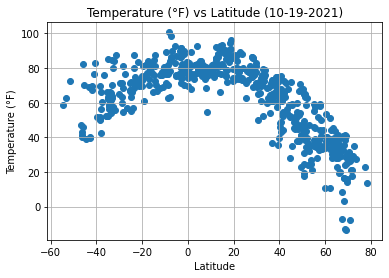

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title(f'Temperature (°F) vs Latitude ({date})')

plt.savefig("../images/tempvslat.png")

As latitute moves towards 0 or the equator, the temperature increases. Vice versa, as you move away from 0, it is colder. 

## Latitude vs. Humidity Plot

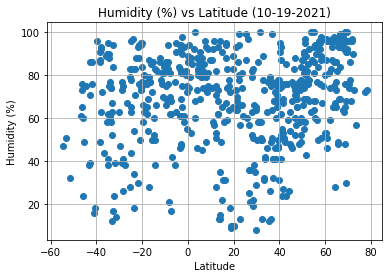

In [16]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Humidity (%) vs Latitude ({date})')

plt.savefig("../images/humidityvslat.png")

Most citites have humidity above 60%, while others with a latitude between 0-40 varies more. Citites with latitude between 40 - 80 have humidity between 80-100%. 

## Latitude vs. Cloudiness Plot

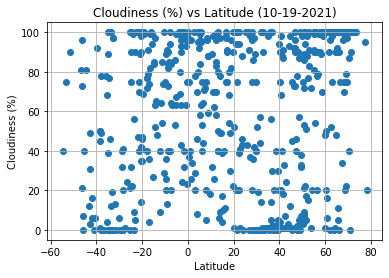

In [17]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'Cloudiness (%) vs Latitude ({date})')

plt.savefig("../images/cloudinessvslat.png")

Cities with latitude 40 - 80 are precieved to have a cloudiness around 80% - 100%. However, most of the data points are realtively distributed. Therefore, there is not much of a correlation between coludiness and latitude.

## Latitude vs. Wind Speed Plot

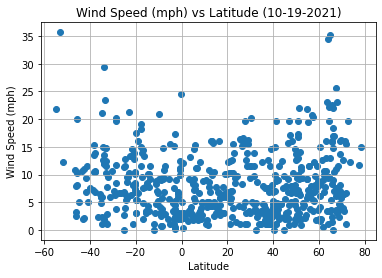

In [18]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Wind Speed (mph) vs Latitude ({date})')

plt.savefig("../images/windspeedvslat.png")

A mjority of the cities have a wind speed of 0MPH to 8MPH, with some cities at a higher(positive and negative) latitude having higher wind speed.

## Linear Regression

In [19]:
northern_cities = city_data_df[city_data_df.loc[:, "Lat"] >= 0]
southern_cities = city_data_df[city_data_df.loc[:, "Lat"] < 0]

In [20]:
#north and south dataframes
northlat_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]
southlat_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

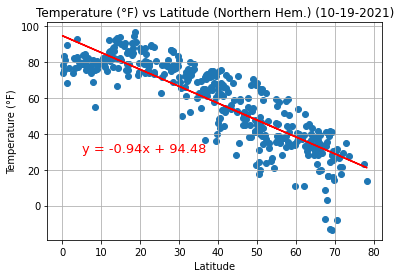

In [23]:
plt.scatter(northern_cities["Lat"], northern_cities["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title(f'Temperature (°F) vs Latitude (Northern Hem.) ({date})')
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Max Temp"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(5,30), fontsize=13,color="red")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatnorthernhem.png")

In the northern hemisphere, the max temperature decreases while the city is away from 0 degree latitude. The high r value inidicates a strong positive correlation. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

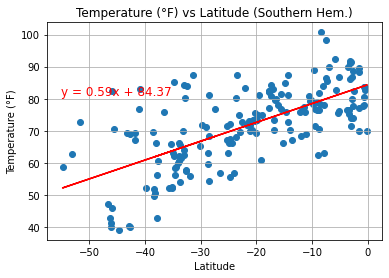

In [26]:
plt.scatter(southern_cities["Lat"], southern_cities["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude (Southern Hem.)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Max Temp"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,81),fontsize=12,color="red")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatsouthernhem.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


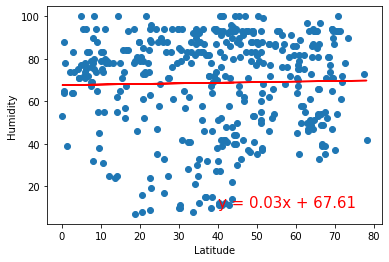

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


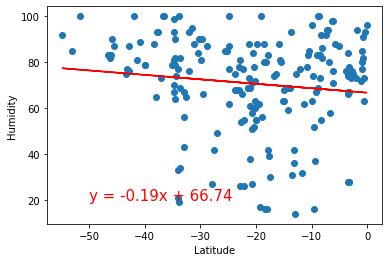

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


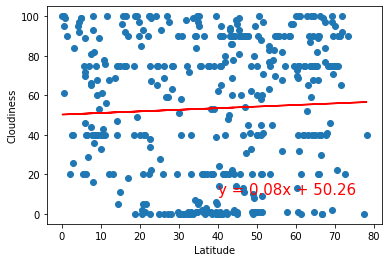

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


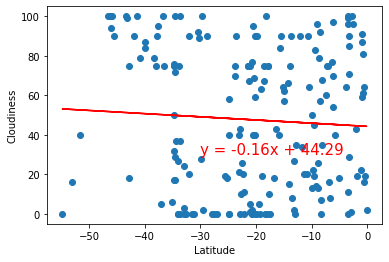

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


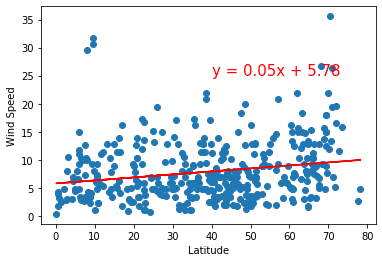

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


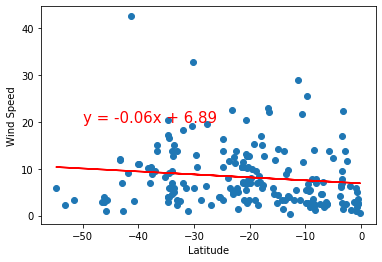